In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,8)

### Reward per Episode

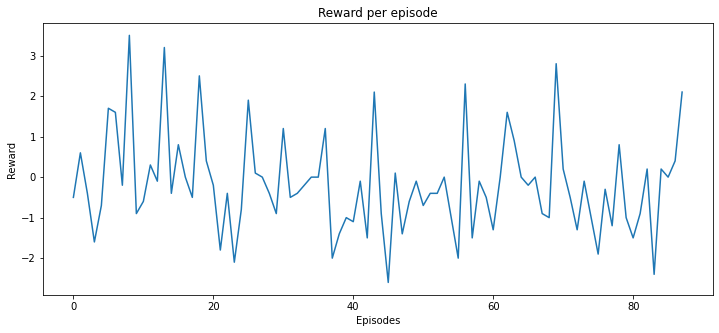

In [15]:
msqe = np.loadtxt("./logs/reward.log")

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(msqe)

ax.set_title("Reward per episode")
ax.set_xlabel("Episodes")
ax.set_ylabel("Reward")

plt.show()

### Runtime

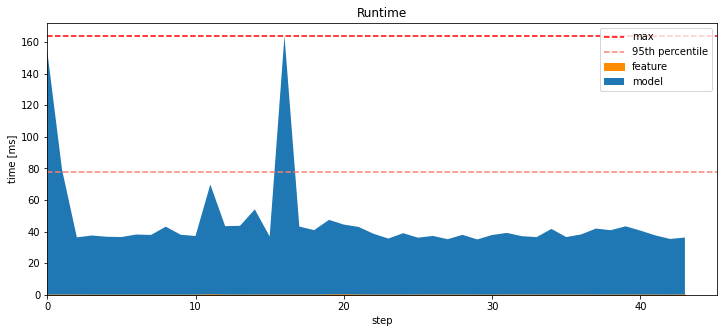

In [13]:
timings = np.loadtxt("./logs/timing_act.log", delimiter=',')

t_feature = timings[:,0]
t_complete = timings[:, 1]

N = len(t_feature)

fig, ax = plt.subplots(figsize=(12, 5))

max_time = np.max(t_complete)
percentile_95 = np.percentile(t_complete, 95)

ax.fill_between(range(N), t_feature, color='darkorange', label="feature")
ax.fill_between(range(N), t_feature , t_complete, label="model")

plt.axhline(y=max_time, color='red', linestyle='--', label='max')
plt.axhline(y=percentile_95, color='salmon', linestyle='--', label='95th percentile')

ax.set_title("Runtime")
ax.set_ylabel("time [ms]")
ax.set_xlabel("step")
ax.legend(loc='upper right')
ax.set_xlim(0)
ax.set_ylim(0)

plt.show()

### Feature Correlation

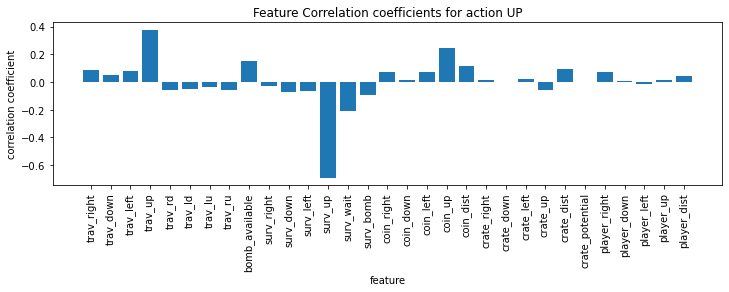

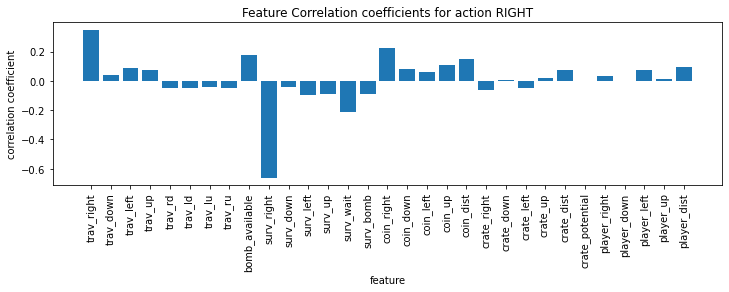

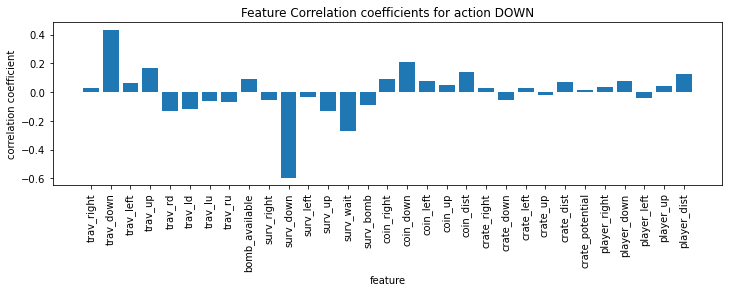

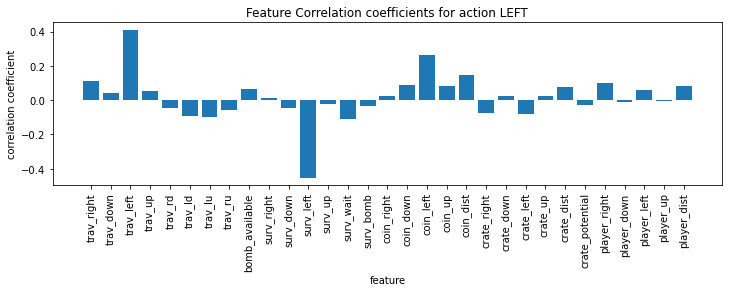

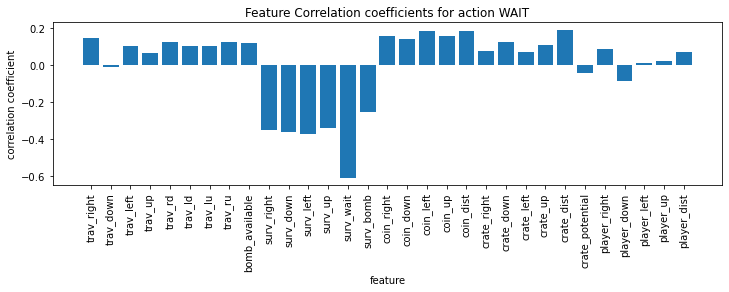

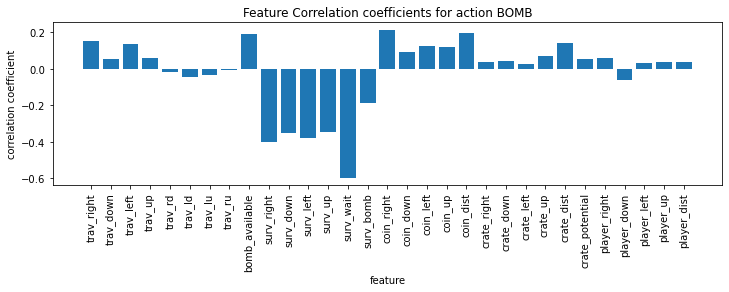

In [397]:
features = np.loadtxt("./logs/features.log", delimiter=',')
Q = np.loadtxt("./logs/q.log", delimiter=',')

ACTIONS = ['UP', 'RIGHT', 'DOWN', 'LEFT', 'WAIT', 'BOMB']
FEATURES = ["trav_right", "trav_down", "trav_left", "trav_up", 
    "trav_rd", "trav_ld", "trav_lu", "trav_ru",
    "bomb_available",
    "surv_right", "surv_down", "surv_left", "surv_up", "surv_wait", "surv_bomb",
    "coin_right", "coin_down", "coin_left", "coin_up", 
    "coin_dist",
    "crate_right", "crate_down", "crate_left", "crate_up",
    "crate_dist",
    "crate_potential",
    "player_right", "player_down", "player_left", "player_up", 
    "player_dist"]

features -= np.mean(features, axis = 0)
var_features = np.var(features, axis = 0)

for i in range(len(ACTIONS)):
    Q_action = Q[:, i]

    var_q = np.var(Q_action)

    Q_action = np.reshape(Q_action - np.mean(Q_action), (-1,1))

    cov = np.mean(features * Q_action, axis = 0) / np.sqrt(var_features * var_q)

    fig, ax = plt.subplots(figsize=(12,3))

    ax.bar(FEATURES, cov)
    plt.xticks(rotation='vertical')

    ax.set_title("Feature Correlation coefficients for action " + ACTIONS[i])
    ax.set_xlabel("feature")
    ax.set_ylabel("correlation coefficient")

### Evaluate Score

In [5]:
import json
import os

STATSFILE = "stats.json"
def evaluate_performance(model, rounds):
    fig, ax = plt.subplots()
    if os.path.exists(STATSFILE):
        os.remove(STATSFILE)
    os.system(f"python3 ../../main.py play --my-agent agent1 --no-gui --n-rounds {rounds} --save-stats stats.json --model {model}")

    with open(STATSFILE, 'r') as f:
        stats = json.load(f)
        by_agent = stats["by_agent"]
        agent_score = [by_agent[agent]["score"] for agent in by_agent.keys()]

        ax.bar(by_agent.keys(), agent_score)
        ax.title.set_text(model)

    print(f"Total agent score: {agent_score[0]}, other agents: {agent_score[1:]}")
    print(f"Average score per round: {agent_score[0]/rounds}")
    print(f"Percentage of points achieved: {100*np.round(agent_score[0]/sum(agent_score), 2)}%")

    plt.show()

#### Version 1

100%|██████████| 50/50 [05:41<00:00,  6.84s/it]


Total agent score: 148, other agents: [212, 161, 147]
Average score per round: 2.96
Percentage of points achieved: 22.0%


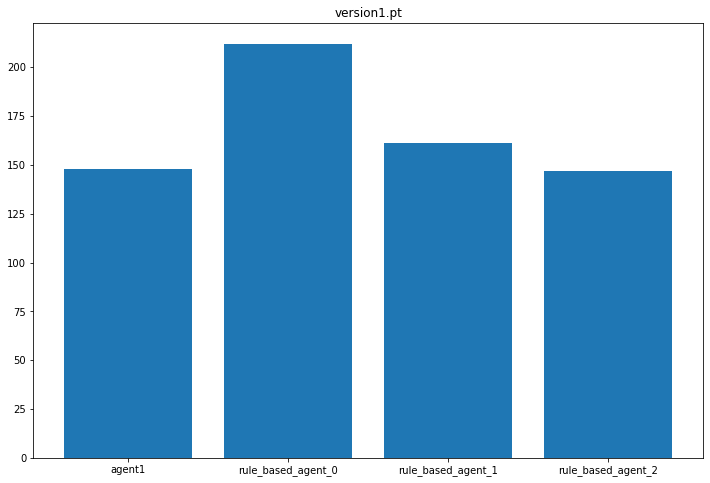

In [6]:
evaluate_performance(model="version1.pt", rounds=50)

100%|██████████| 50/50 [03:11<00:00,  3.82s/it]


Total agent score: 142, other agents: [131, 166, 160]
Average score per round: 2.84
Percentage of points achieved: 24.0%


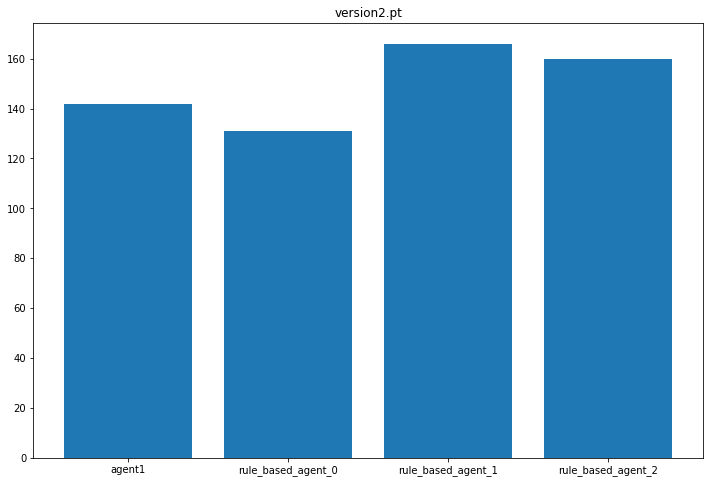

In [395]:
evaluate_performance(model="version2.pt", rounds=50)

100%|██████████| 10/10 [00:35<00:00,  3.53s/it]


Total agent score: 12, other agents: [29, 40, 29]
Average score per round: 1.2
Percentage of points achieved: 11.0%


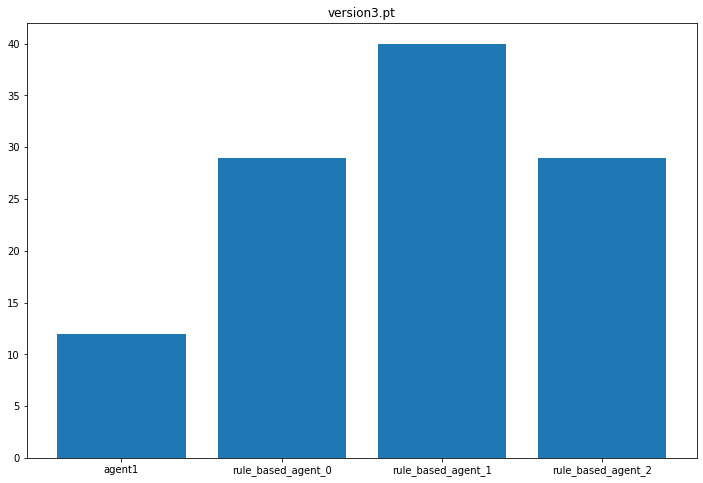

In [17]:
evaluate_performance(model="version3.pt", rounds=10)

100%|██████████| 50/50 [04:07<00:00,  4.95s/it]


Total agent score: 83, other agents: [158, 156, 168]
Average score per round: 1.66
Percentage of points achieved: 15.0%


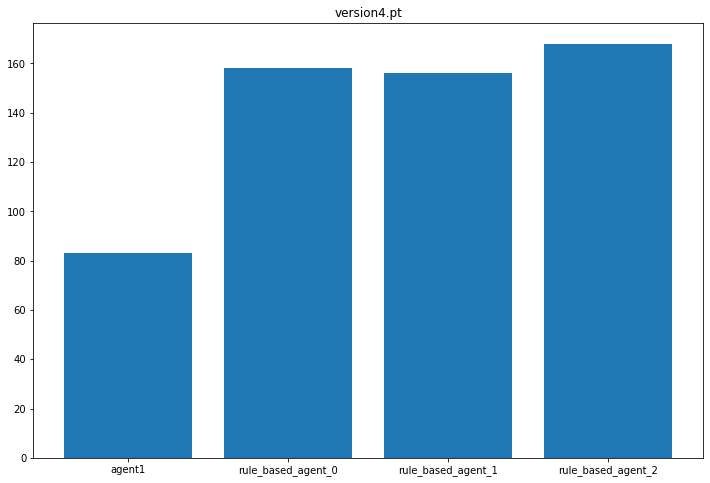

In [8]:
evaluate_performance(model="version4.pt", rounds=50)